In [0]:
!pip install scikit-plot

In [0]:
import random
import numpy as np
import torch
import torchvision
from  torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from  torchvision import datasets, transforms
from torchsummary import summary
import os
import skimage

In [0]:
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim import utils
from nltk.corpus import stopwords

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte,ypred,normalize=True)
    plt.show()

In [0]:
class nn_Fake_News(nn.Module):
  def __init__(self):
    super(nn_Fake_News, self).__init__()
    self.nn_forward = nn.Sequential(
        nn.Linear(300, 256),
        nn.ReLU(),
        nn.Dropout(0.8),
        # nn.Linear(256, 256),
        # nn.ReLU(),
        # nn.Dropout(0.5),
        nn.Linear(256, 80),
        nn.ReLU(),
        nn.Dropout(0.8),
        nn.Linear(80, 2),
        #nn.Sigmoid()
    )

  def forward(self, input):
    return self.nn_forward(input)


In [0]:
xtr = np.load('./xtr.npy')
xte = np.load('./xte.npy')
ytr = np.load('./ytr.npy')
yte = np.load('./yte.npy')

tr_label = np.zeros((xtr.shape[0], 2), dtype=float)
for i in range(xtr.shape[0]):
  if ytr[i] == 1:
    tr_label[i, :] = [0.0, 1.0]
  else:
    tr_label[i, :] = [1.0, 0.0]
tr_label = torch.from_numpy(tr_label).type(torch.DoubleTensor).cuda()

In [0]:
nn_FN = nn_Fake_News().double().cuda()
optimizer = optim.SGD(nn_FN.parameters(), lr=0.01, momentum=0.9)

loss_function = nn.BCEWithLogitsLoss()

for epoch in range(1000):  
  y_pred = nn_FN(torch.from_numpy(xtr).cuda())

  optimizer.zero_grad()
  loss = loss_function(y_pred, tr_label.detach())
  
  loss.backward()
  optimizer.step()        

  #print("Loss = %.5f" % loss.item()) 
  if (epoch%100==0):
    print("Epoch %d" % epoch)
    print("Loss = %.5f" % loss.item()) 
    torch.save(nn_FN, 'nn_Fake_News.pkl')

print('Finished Training')

Epoch 0
Loss = 0.69824
Epoch 100
Loss = 0.65173
Epoch 200
Loss = 0.43305
Epoch 300
Loss = 0.32857
Epoch 400
Loss = 0.28749
Epoch 500
Loss = 0.26329
Epoch 600
Loss = 0.24763
Epoch 700
Loss = 0.23469
Epoch 800
Loss = 0.22305
Epoch 900
Loss = 0.21600
Finished Training


Accuracy = 92.27%


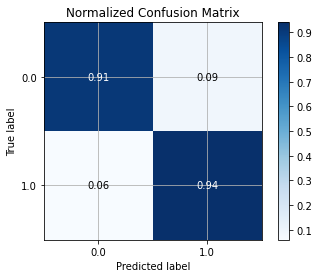

In [0]:
y_pred_raw = nn_FN(torch.from_numpy(xte).cuda())
y_pred = np.zeros(y_pred_raw.shape[0])
for i in range(y_pred_raw.shape[0]):
    if y_pred_raw[i, 1] > y_pred_raw[i, 0]:
      y_pred[i] = 1
    else:
      y_pred[i] = 0

m = yte.shape[0]
n = (yte != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%")   # 72.94%

# Draw the confusion matrix
plot_cmat(yte, y_pred)